In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Load data and skip first 10000 entries

In [2]:
# Load data and skip first 1000 entries
data = np.genfromtxt("task5/MI_timesteps.txt", dtype='int', skip_header=1000)
print(f"Shape: {data.shape}")

Shape: (14002, 10)


### Because we have 9 measurements, we need 2*9+1 = 19 dimensions to embeed the data

# Part One

In [3]:
x_dim = data.shape[0] - 350
windows_matrix = np.zeros((x_dim, 1053))
for i in range(x_dim):
    windows_matrix[i] = data[i:i+351, 1:4].flatten()
print(windows_matrix.shape)

(13652, 1053)


In [4]:
pca = PCA(3)
pca_data = pca.fit_transform(windows_matrix)

### Plot trajectory

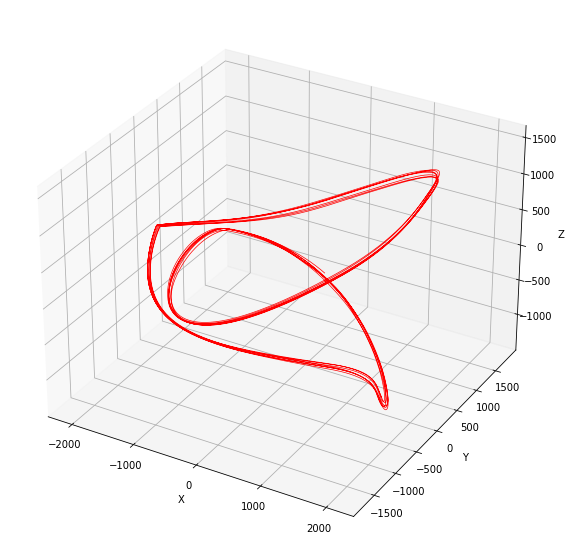

In [5]:
#Plot the trajectory of data
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(projection='3d'))
ax.plot(pca_data[:,0], pca_data[:,1], pca_data[:,2], linewidth=0.7, color='r')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.savefig('task5/Figures/PCA_data_trajectory')

# Part Two

(13652,)


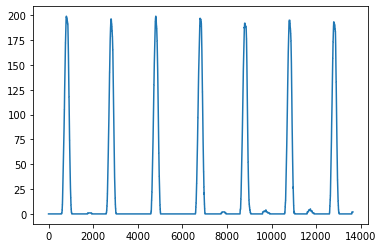

In [6]:
first_area = data[:pca_data.shape[0], 0 + 1]
print(first_area.shape)
plt.plot(first_area)

(13652,)


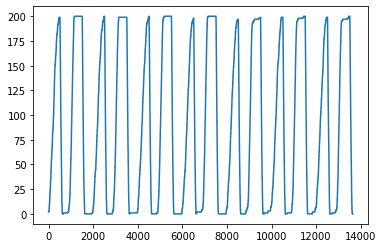

In [7]:
second_area = data[:pca_data.shape[0], 1 + 1]
print(second_area.shape)
plt.plot(second_area)

### Plot different areas

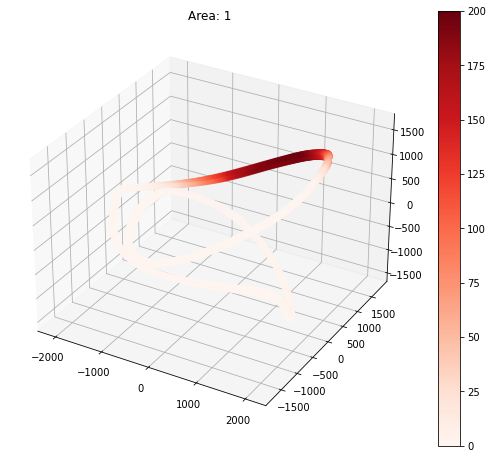

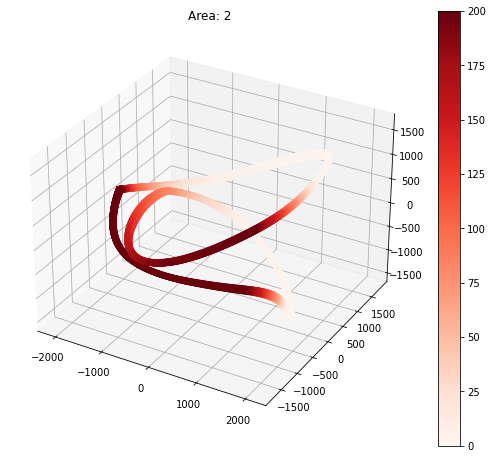

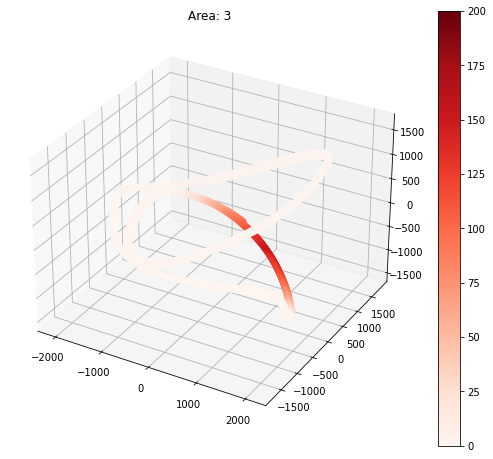

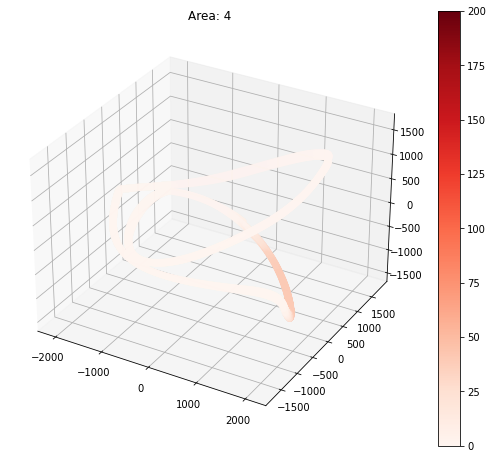

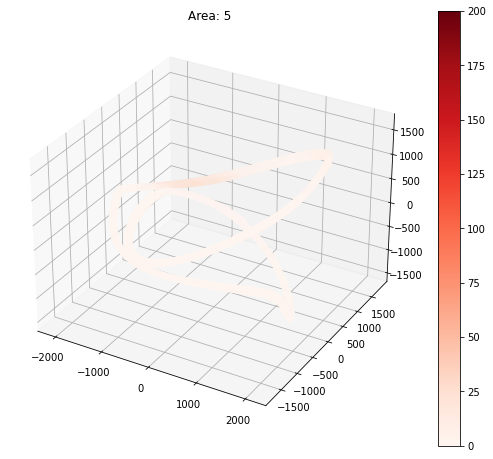

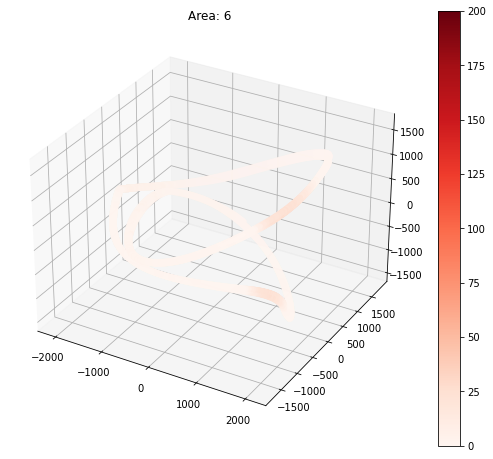

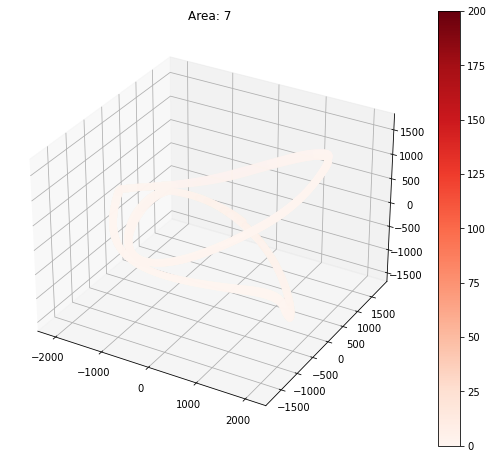

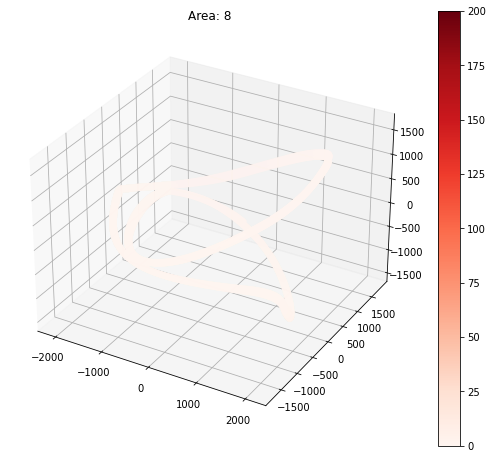

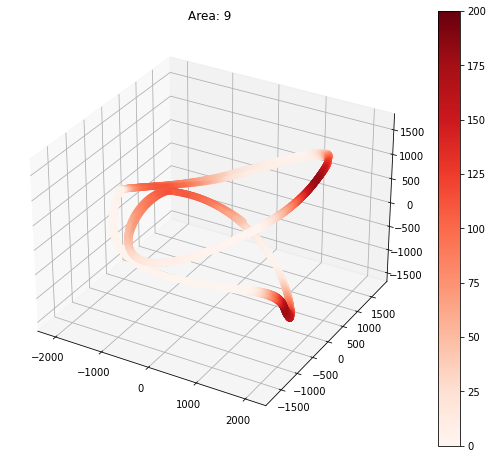

In [8]:
# plot colors for different areas
for i in range(9):
    fig = plt.figure(figsize=(20, 8))
    ax0 = fig.add_subplot(1, 2, 1, projection='3d')
    normalize = matplotlib.colors.Normalize(vmin=0, vmax=200)
    t = ax0.scatter(pca_data[:,0], pca_data[:,1], pca_data[:,2], c = data[:pca_data.shape[0], i + 1], cmap="Reds", norm=normalize)
    plt.colorbar(t)
    plt.title(f"Area: {i+1}")
    plt.savefig('task5/Figures/Area' + str(i+1) + '_trajectory')

# Part Three

### Define archlength

In [9]:
from sklearn.metrics import mean_squared_error
from extract_dynamical_systems import find_radial_basis_function_means, rbf, phi, least_squares_minimization, calculate_x_from_vector, finite_difference

# define arch length function
def arc_length(x, y, z):
    arc = np.sqrt((x[1] - x[0])**2 + (y[1] - y[0])**2+ (z[1] - z[0])**2)
    for i in range(2, len(x)):
        arc = arc + np.sqrt((x[i] - x[i-1])**2 + (y[i] - y[i-1])**2+ (z[i] - z[i-1])**2)

    return arc

In [10]:
# calculate archlengths calculations
arclengths_calculation = []
for i in range(pca_data.shape[0]-1):
    x = [pca_data[i][0],pca_data[i+1][0]]
    y = [pca_data[i][1],pca_data[i+1][1]]
    z = [pca_data[i][2],pca_data[i+1][2]]
    arclengths_calculation.append(arc_length(x, y, z))

In [11]:
# define delta t
delta_t = 1
# transform data to array
x1 = np.asarray(arclengths_calculation[1:len(arclengths_calculation)])
x0 = np.asarray(arclengths_calculation[0:len(arclengths_calculation)-1])
# get vector value
v1 = (x1 - x0)/delta_t

In [12]:
# reshape data to be able to apply rbf
x0 = x0.reshape(x0.shape[0], 1)
v1 = v1.reshape(v1.shape[0], 1)

In [13]:
# define epsilon
epsilon = 0.01
# get centers for radial basis function
radial_means = find_radial_basis_function_means(x0,100)
print(radial_means.shape)

# apply phi function on data
phi_on_X0 = phi(x0, radial_means, epsilon)
# calculate matrix A using least squared method
A_t = least_squares_minimization(phi_on_X0, v1, rcond=2).T
new_data_v1 = phi_on_X0.dot(A_t)
new_data_x1 = calculate_x_from_vector(new_data_v1, x0, delta_t)
# calculate mean squared error
mse = mean_squared_error(x1, new_data_x1)
print(mse)

(100, 1)
0.006431856610023636


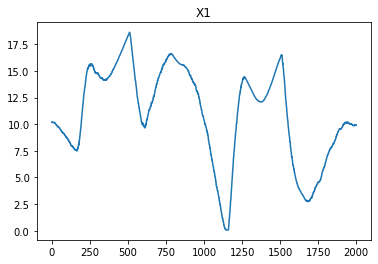

In [14]:
# plot x1
plt.plot(x1[:2000])
plt.title('X1')
plt.savefig('task5/Figures/data_x1')

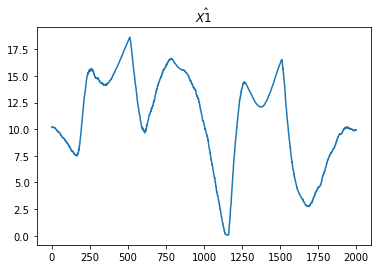

In [15]:
# plot x1_hat
plt.plot(new_data_x1[:2000])
plt.title('$\hat{X1}$')
plt.savefig('task5/Figures/data_x1_hat')

# Part four

In [16]:
# apply phi function on data new_data_x1
phi_on_X1 = phi(new_data_x1, radial_means, epsilon)
new_data_v2 = phi_on_X1.dot(A_t)
new_data_x2 = calculate_x_from_vector(new_data_v2, x0, delta_t)

In [17]:
# apply phi function on data new_data_x2
phi_on_X2 = phi(new_data_x2, radial_means, epsilon)
new_data_v3 = phi_on_X2.dot(A_t)
new_data_x3 = calculate_x_from_vector(new_data_v3, x0, delta_t)

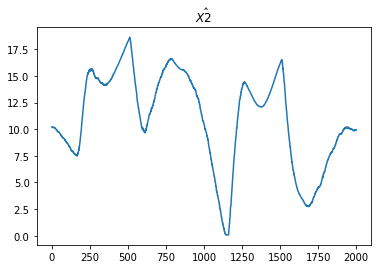

In [18]:
#plot x2_hat
plt.plot(new_data_x2[:2000])
plt.title('$\hat{X2}$')
plt.savefig('task5/Figures/data_x2_hat')

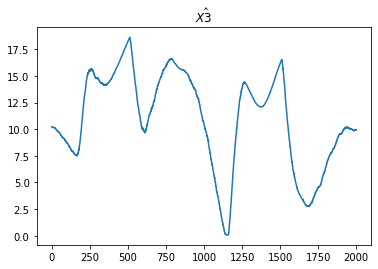

In [19]:
# plot x3_hat
plt.plot(new_data_x3[:2000])
plt.title('$\hat{X3}$')
plt.savefig('task5/Figures/data_x3_hat')

(27300, 1)


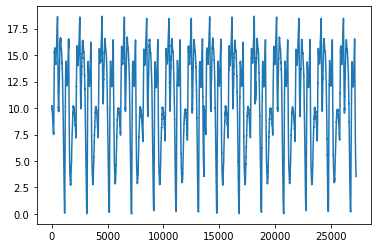

In [20]:
x2_x3 = np.vstack((new_data_x2, new_data_x3))
print(x2_x3.shape)
plt.plot(x2_x3)
plt.savefig('task5/Figures/14days_prediction')